In [1]:
%load_ext autoreload

In [2]:
autoreload 2

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import sympy as sym
import csv


import inputs
import models
import shooting

from __future__ import division

In [5]:
# define some default workers skill
x, mu1, sigma1 = sym.var('x, mu1, sigma1')
skill_cdf = 0.5 + 0.5 * sym.erf((sym.log(x) - mu1) / sym.sqrt(2 * sigma1**2))
skill_params = {'mu1': 0.1, 'sigma1': 0.56}
skill_bounds = [0.0605, 2.8589]

workers = inputs.Input(var=x,
                       cdf=skill_cdf,
                       params=skill_params,
                       bounds=skill_bounds,
                       )

# define some default firms
y, mu2, sigma2 = sym.var('y, mu2, sigma2')
productivity_cdf = 0.5 + 0.5 * sym.erf((sym.log(y) - mu2) / sym.sqrt(2 * sigma2**2))
productivity_params = {'mu2': -0.5771 , 'sigma2': 0.9759}
productivity_bounds = [0.0095, 26.0]

firms = inputs.Input(var=y,
                     cdf=productivity_cdf,
                     params=productivity_params,
                     bounds=productivity_bounds,
                     )

# define symbolic expression for CES between x and y
omega_A, sigma_A = sym.var('omega_A, sigma_A')
A = ((omega_A * x**((sigma_A - 1) / sigma_A) + 
     (1 - omega_A) * y**((sigma_A - 1) / sigma_A))**(sigma_A / (sigma_A - 1))) 

# define symbolic expression for Cobb-Douglas between l and r
l, r, omega_B, sigma_B = sym.var('l, r, omega_B, sigma_B')
B = l**omega_B * r**(1 - omega_B)

F = A * B

F_params = {'omega_A':0.75, 'omega_B':0.70, 'sigma_A':0.6, 'sigma_B':1.0}

model = models.Model('positive',
                     workers=workers,
                     firms=firms,
                     production=F,
                     params=F_params)

solver = shooting.ShootingSolver(model=model)

In [45]:
solver.solve(10, tol=1e-6, number_knots=6000, atol=1e-15, rtol=1e-12, integrator='lsoda', message=True)

Exhausted workers: initial guess of 50.0 for firm size is too high!
Exhausted workers: initial guess of 25.0 for firm size is too high!
Exhausted workers: initial guess of 12.5 for firm size is too high!
Exhausted workers: initial guess of 6.25 for firm size is too high!
Exhausted workers: initial guess of 3.125 for firm size is too high!
Exhausted firms: initial guess of 1.5625 for firm size is too low.
Exhausted firms: initial guess of 2.34375 for firm size is too low.
Exhausted firms: initial guess of 2.734375 for firm size is too low.
Exhausted firms: initial guess of 2.9296875 for firm size is too low.
Exhausted workers: initial guess of 3.02734375 for firm size is too high!
Exhausted workers: initial guess of 2.978515625 for firm size is too high!
Exhausted workers: initial guess of 2.9541015625 for firm size is too high!
Exhausted firms: initial guess of 2.94189453125 for firm size is too low.
Exhausted firms: initial guess of 2.94799804688 for firm size is too low.
Exhausted fi

In [46]:
solver.solution

,$\mu(x)$,$\theta(x)$,$w(x)$,$\pi(x)$
x,,,,
0.060500,0.009500,0.025123,0.062664,0.000675
0.060966,0.009546,0.025213,0.062986,0.000681
0.061433,0.009595,0.025312,0.063306,0.000687
0.061899,0.009645,0.025422,0.063625,0.000693
0.062366,0.009698,0.025541,0.063943,0.000700
0.062832,0.009752,0.025671,0.064259,0.000707
0.063299,0.009809,0.025811,0.064575,0.000714
0.063765,0.009867,0.025960,0.064890,0.000722
0.064232,0.009928,0.026119,0.065204,0.000730


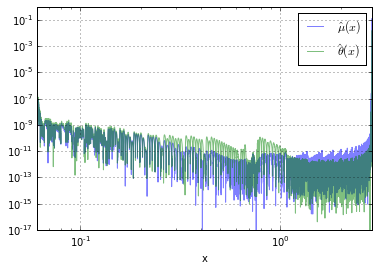

In [48]:
solver.residuals.plot(loglog=True, alpha=0.5)
plt.show()

In [6]:
import estimation_code_1 as est

In [7]:
with open('germandata05.csv', 'rb') as f:
    reader = csv.reader(f)
    data = list(reader)

wage = []
profit = []
size = []
for row in data[1:]:
    wage.append(float(row[0]))
    profit.append(float(row[1]))
    size.append(float(row[2]))

mean_wage = np.mean(wage)
wage = wage/mean_wage
mean_p = np.mean(profit)
profit = profit/mean_p
mean_size = np.mean(size)
size = size/mean_size


In [68]:
functions, guess = est.Solve_Model(F, F_params, workers, firms, 'positive', 6000.0, 'lsoda', 10)

Success! All workers and firms are matched


In [66]:
est.Calculate_MSE( (wage, profit, size, wage), (mu_hat, theta_hat, w_hat) )

2186.1283629504701

In [69]:
mu_hat, theta_hat, w_hat = functions

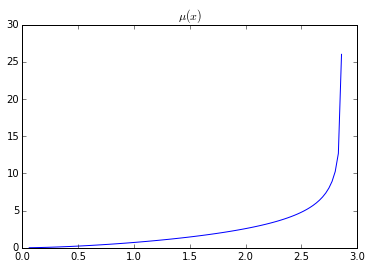

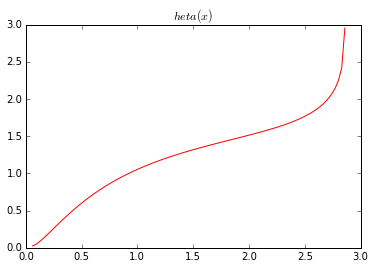

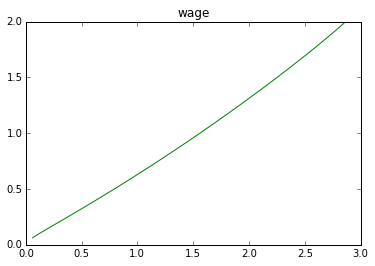

In [70]:
xs = np.linspace(0.0605, 2.8589,100)
mu_plot = []
theta_plot = []
w_plot = []
for i in range(len(xs)):
    mu_plot.append(mu_hat(xs[i]))
    theta_plot.append(theta_hat(xs[i]))
    w_plot.append(w_hat(xs[i]))
                   
#print mu_plot               
                   
plt.plot(xs,mu_plot, color='blue')
plt.title('$\mu(x)$')
plt.show()

plt.plot(xs,theta_plot, color='red')
plt.title('$\theta(x)$')
plt.show()

plt.plot(xs,w_plot, color='green')
plt.title('wage')
plt.show()



In [54]:
mu_hat(4)

array(-11016890327.16156)

In [55]:
from scipy.optimize import fmin

In [24]:
thetas[-1]

0

## Iterate for some parameters

In [8]:
om = 1.0
h_theta = 100
results_i = []
not_working = []
for i in range(42):
    om -= 0.02
    params_i = {'omega_A':0.75, 'omega_B':om, 'sigma_A':0.6, 'sigma_B':1.0}
    try:
        functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 6000, 'lsoda', h_theta)
        mu_hat, theta_hat, w_hat = functions
        results_i.append(est.Calculate_MSE( (wage, profit, size, wage), (mu_hat, theta_hat, w_hat) ))
        print 'Done with', om
    except AssertionError:
        not_working.append(om)
        print 'Skipped error', om
        pass




Skipped error 0.98
Skipped error 0.96
Skipped error 0.94
Skipped error 0.92
Skipped error 0.9
Skipped error 0.88
Skipped error 0.86
Skipped error 0.84
Skipped error 0.82
Skipped error 0.8
Skipped error 0.78
Skipped error 0.76
Success! All workers and firms are matched
Done with 0.74
Skipped error 0.72
Skipped error 0.7
Skipped error 0.68
Success! All workers and firms are matched
Done with 0.66
Skipped error 0.64
Success! All workers and firms are matched
Done with 0.62
Skipped error 0.6
Success! All workers and firms are matched
Done with 0.58
Success! All workers and firms are matched
Done with 0.56
Skipped error 0.54
Skipped error 0.52
Success! All workers and firms are matched
Done with 0.5
Success! All workers and firms are matched
Done with 0.48
Success! All workers and firms are matched
Done with 0.46
Success! All workers and firms are matched
Done with 0.44
Success! All workers and firms are matched
Done with 0.42
Success! All workers and firms are matched
Done with 0.4
Success

In [9]:
print results_i

[2103.386417207912, 2268.1371747278104, 2348.1787380565979, 2427.3514135727428, 2467.1980793315956, 2591.5524757120729, 2635.9909004627993, 2682.8549115931851, 2732.9441835142206, 2787.3311910483021, 2847.507572116845, 2915.6295076661977, 2994.9477298652955, 3090.6009265955922, 3211.1705800687901, 3371.9531185020751, 3602.4531734729117, 3965.362850338186, 4610.7951366868238, 5955.4615778564421, 9388.8209413670993, 20734.397208223854, 72645.425964431313]


In [90]:
print results_i

[2663.3795714402918]


In [93]:
print results_i

[2481.6764485082967]


In [ ]:
    else:
        params_i = {'omega_A':0.75, 'omega_B':0.70, 'sigma_A':om, 'sigma_B':1.0}
        Est_Dis = solve_model.Solve_Model(F, params_i, workers, firms, 'positive', 100, 'vode', 2e4)
        model_param = (Est_Dis[0], Est_Dis[1])
        results_i.append(solve_model.Calculate_MSE_pdf(data_points, data_param, model_param, 'lognormal'))

In [ ]:
solver.solution

In [25]:
xs = solver.solution.index.values
rmus = solver.solution['$\\mu(x)$'].values
rthetas = solver.solution['$\\theta(x)$'].values
rws = solver.solution['$w(x)$'].values

In [28]:
xs[-1]

340.61270000000002